In [10]:
import visual_behavior_glm.GLM_visualization_tools as gvt
import visual_behavior_glm.GLM_analysis_tools as gat
import pandas as pd

In [7]:
%matplotlib notebook
%widescreen

applied a custom magic command to make full use of screen width
will only work if command is defined locally
replace with the following to replicate functionality: 
	from IPython.core.display import display, HTML
	display(HTML("<style>.container { width:100% !important; }</style>")


## results from running the GLM are cached in a mongo database. 

In [4]:
results = gat.retrieve_results()

### reconcile the different column names 'Full_avg_cv_var_test' and 'Full__avg_cv_var_test'

In [30]:
for idx,row in results.iterrows():
    for tt in ['train','test']:
        if pd.isnull(row['Full_avg_cv_var_{}'.format(tt)]) and pd.notnull(row['Full__avg_cv_var_{}'.format(tt)]):
            results.at[idx,'Full_avg_cv_var_{}'.format(tt)] = row['Full__avg_cv_var_{}'.format(tt)]

In [15]:
results['glm_version'].unique()

array(['3', '4_L2_optimize_by_session', '4_L2_fixed_lambda=1',
       '4_L2_optimize_by_cell', '2', '4_L2_opt_by_cell_tighter_grid',
       '4_L2_opt_by_session_tighter_grid', '5_L2_fixed_lambda=1',
       '5_L2_optimize_by_cell', '5_L2_optimize_by_session', '1',
       '6_L2_optimize_by_session', '6_L2_optimize_by_cell',
       'test_fixed_lambda=50'], dtype=object)

## Now plot variance explained for the versions that have been run as a batch

<IPython.core.display.Javascript object>


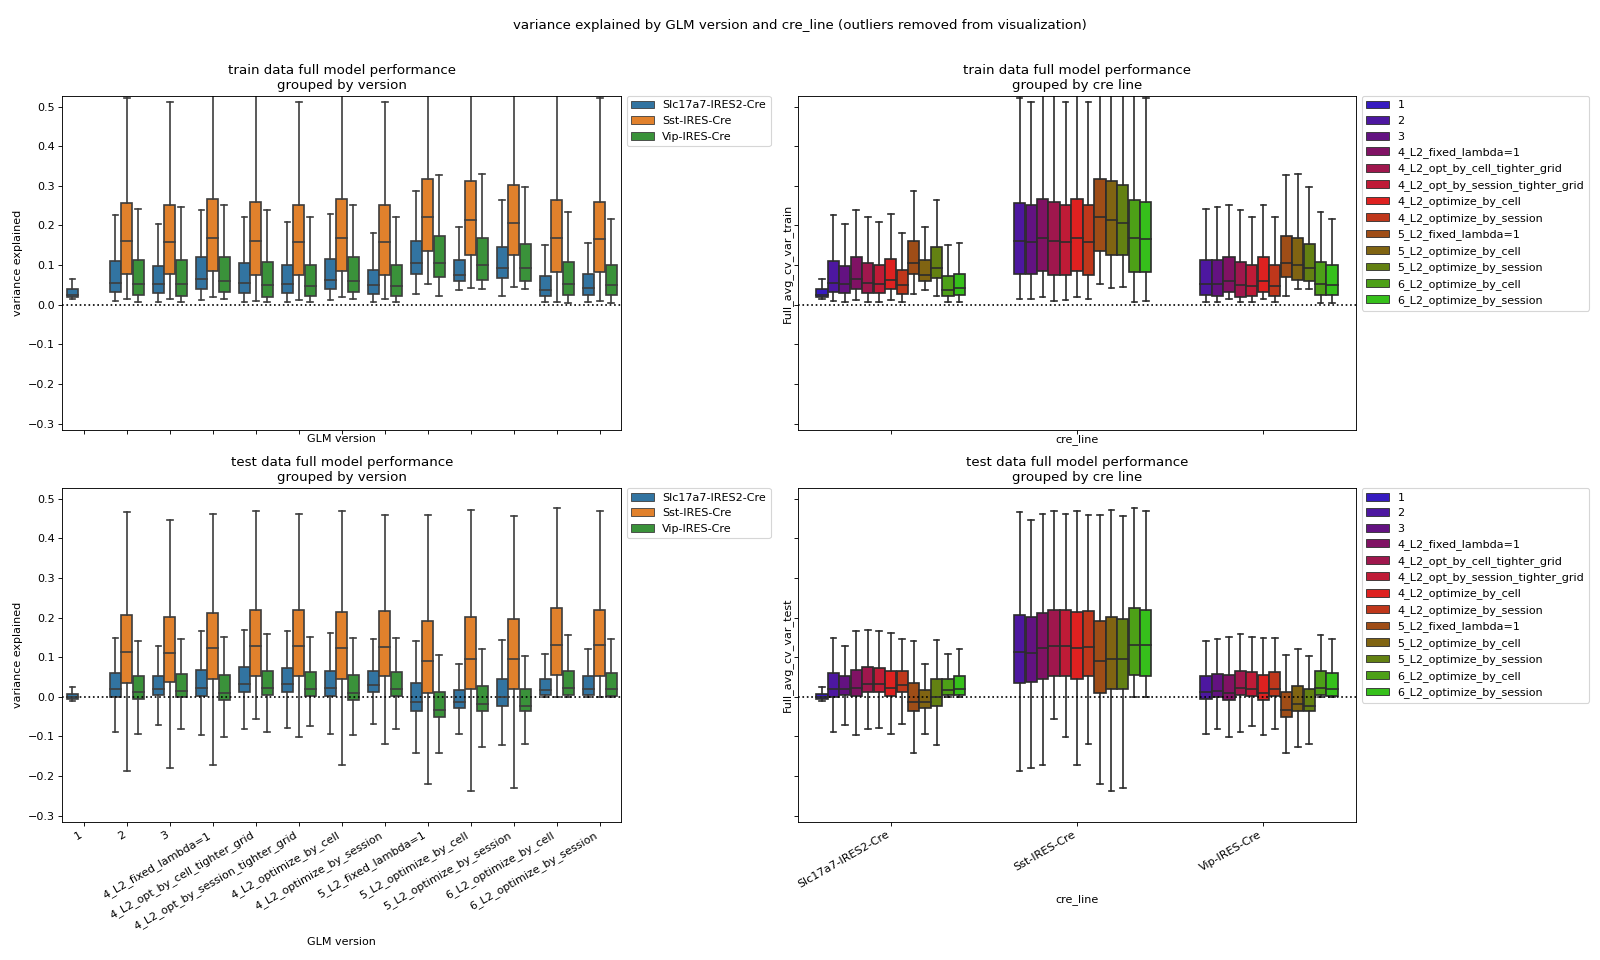

In [40]:
fig, ax = gvt.compare_var_explained(results[results['glm_version']!='test_fixed_lambda=50'], figsize=(20,12))

## get median variance explained for each version/cre-line

In [27]:
results_summary = results.groupby(['glm_version','cre_line'])['Full_avg_cv_var_test'].describe()
results_summary

count      mean  \
glm_version                      cre_line                               
1                                Slc17a7-IRES2-Cre    104.0  0.020638   
2                                Slc17a7-IRES2-Cre  38804.0  0.036867   
                                 Sst-IRES-Cre        1531.0  0.105114   
                                 Vip-IRES-Cre        4008.0 -0.028685   
3                                Slc17a7-IRES2-Cre  31660.0  0.008814   
                                 Sst-IRES-Cre        1090.0  0.115679   
                                 Vip-IRES-Cre        2931.0 -0.017609   
4_L2_fixed_lambda=1              Slc17a7-IRES2-Cre  37688.0  0.052536   
                                 Sst-IRES-Cre        1531.0  0.153570   
                                 Vip-IRES-Cre        4008.0 -0.083854   
4_L2_opt_by_cell_tighter_grid    Slc17a7-IRES2-Cre  37141.0  0.064336   
                                 Sst-IRES-Cre        1531.0  0.163134   
                                 Vip-IRES-Cre        4008.0  0.022281   
4_L2_opt_by_session_tighter_grid Slc17a7-IRES2-Cre  37669.0  0.061704   
                                 Sst-IRES-Cre        1531.0  0.160048   
                                 Vip-IRES-Cre        4008.0  0.010828   
4_L2_optimize_by_cell            Slc17a7-IRES2-Cre  37141.0  0.051412   
                                 Sst-IRES-Cre        1531.0  0.153185   
                                 Vip-IRES-Cre        4008.0 -0.019169   
4_L2_optimize_by_session         Slc17a7-IRES2-Cre  32008.0  0.056880   
                                 Sst-IRES-Cre        1531.0  0.159592   
                                 Vip-IRES-Cre        4008.0  0.003890   
5_L2_fixed_lambda=1              Slc17a7-IRES2-Cre  35819.0  0.015426   
                                 Sst-IRES-Cre        1237.0  0.124133   
                                 Vip-IRES-Cre        3195.0 -0.016277   
5_L2_optimize_by_cell            Slc17a7-IRES2-Cre  12875.0  0.015353   
                                 Sst-IRES-Cre        1237.0  0.132081   
                                 Vip-IRES-Cre        2878.0 -0.000269   
5_L2_optimize_by_session         Slc17a7-IRES2-Cre  35819.0  0.027229   
                                 Sst-IRES-Cre        1237.0  0.130195   
                                 Vip-IRES-Cre        3179.0 -0.003277   
6_L2_optimize_by_cell            Slc17a7-IRES2-Cre  44414.0  0.045066   
                                 Sst-IRES-Cre        2730.0  0.162117   
                                 Vip-IRES-Cre        8146.0  0.045840   
6_L2_optimize_by_session         Slc17a7-IRES2-Cre  58971.0  0.047626   
                                 Sst-IRES-Cre        2730.0  0.160000   
                                 Vip-IRES-Cre        8339.0  0.043776   
test_fixed_lambda=50             Vip-IRES-Cre          45.0  0.034330   

                                                         std         min  \
glm_version                      cre_line                                  
1                                Slc17a7-IRES2-Cre  0.072210   -0.083875   
2                                Slc17a7-IRES2-Cre  0.149529   -5.005286   
                                 Sst-IRES-Cre       0.686418  -22.432700   
                                 Vip-IRES-Cre       1.234790  -65.585382   
3                                Slc17a7-IRES2-Cre  0.263403  -10.789742   
                                 Sst-IRES-Cre       0.326089   -4.459997   
                                 Vip-IRES-Cre       1.961289  -99.453246   
4_L2_fixed_lambda=1              Slc17a7-IRES2-Cre  0.102667   -4.160537   
                                 Sst-IRES-Cre       0.154733   -0.316459   
                                 Vip-IRES-Cre       5.006574 -286.955881   
4_L2_opt_by_cell_tighter_grid    Slc17a7-IRES2-Cre  0.094753   -1.698785   
                                 Sst-IRES-Cre       0.151501   -0.056893   
                                 Vip-IRES-Cre       1.201433  -75.633